In [1]:
__author__ = 'Dennis Strik'

#Import of different libraries
import matplotlib.pyplot as plt
plt.style.use('bmh')

import matplotlib.lines as mlines
from shapely.geometry import Polygon #Module for manipulation and analysis of geometric objects in the Cartesian plane.
import pandas as pd #This module provides high-performance, easy-to-use data structures and data analysis tools for Python
from shapely.geometry import Point #The Point constructor takes positional coordinate values or point tuple parameters to create a single point.
import numpy as np
from geopy import distance





In [59]:
# Sprecify the file location here
filename1 = 'F:\\AIS KWC export april 2017\\db_20170401_00-00_20170409_23-59_int_30.csv.zip'
filename2 = 'F:\\AIS KWC export april 2017\\db_20170410_00-00_20170419_23-59_int_30.csv.zip'
filename3 = 'F:\\AIS KWC export april 2017\\db_20170420_00-00_20170430_23-59_int_30.csv.zip'
filename4 = 'F:\\AIS KWC export april 2017\\db_20170501_00-00_20170531_23-59_int_30.csv.zip'
filename4 = 'F:\\AIS KWC export april 2017\\db_20170601_00-00_20170630_23-59_int_30.csv.zip'
df = pd.read_csv(filename1)


C:\Program Files\Python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
# Creation of a new dataframe df_new without the less relevant columns
systemID = df.iloc[:,0:1]
name_lat_long = df.iloc[:,6:9]
imo = df.iloc[:,33:34]
t_init = df.iloc[:,1:2]
t_update = df.iloc[:,2:3]
mmsi = df.iloc[:,5:6]
ves = df.iloc[:,40:41]
des = df.iloc[:,30:31]
speed = df.iloc[:,20:21]
heading = df.iloc[:,21:22]
length = df.iloc[:,11:12]
navstatus = df.iloc[:,14:15]

df_new = pd.concat([systemID, name_lat_long, imo, mmsi, ves, des, speed, heading, length, navstatus ,t_init, t_update, ],axis=1)
df_new.columns = ['SystemID', 'Name', 'Lat', 'Lon', 'IMO', 'MMSI', 'Schiptype', 'Destination', 'Speed', 'Heading', 'Length', "NavStatus", 'Starttime', 'Updatetime']
df_new.head()

,SystemID,Name,Lat,Lon,IMO,MMSI,Schiptype,Destination,Speed,Heading,Length,NavStatus,Starttime,Updatetime
0,2017033110542822342,ATLANTIC STAR,54.168641,5.218501,9670573.0,235112573.0,70.0,GOTHENBURG,9.2,28.2,296.0,0.0,2017-03-31 10:54:28.081,2017-04-01 00:00:00.01
1,2017033113524624373,ADVANCE VICTORIA,54.652343,5.158960,9321160.0,309827000.0,80.0,DK SKA,7.1,28.1,228.0,0.0,2017-03-31 13:52:46.084,2017-04-01 00:00:00.01
2,2017033115202018574,NaN,53.264877,5.131646,NaN,NaN,NaN,NaN,0.2,137.2,4.4,NaN,2017-03-31 15:20:20.514,2017-04-01 00:00:00.01
3,2017033116031808731,NaN,53.224253,5.204229,NaN,NaN,NaN,NaN,0.3,72.4,60.9,NaN,2017-03-31 16:03:18.012,2017-04-01 00:00:00.01
4,2017033118175123110,MSC MARIANNA,53.597917,5.148714,9226920.0,352335000.0,70.0,ANTWERP,5.2,252.9,344.4,0.0,2017-03-31 18:17:51.513,2017-04-01 00:00:00.01


In [64]:
# Cleanin, removal of MMSI without a number and change the datetime columns in datetime format.
df_new = df_new[np.isfinite(df_new['MMSI'])]
df_new['Starttime'] = df_new['Starttime'].astype('datetime64[ns]')
df_new['Updatetime'] = df_new['Updatetime'].astype('datetime64[ns]')


In [65]:
mintime = min(df_new['Updatetime'])
maxtime = max(df_new['Updatetime'])
print(mintime, maxtime) 

2017-04-01 00:00:00.010000 2017-04-01 01:03:40.077000


In [66]:
# Creation of the polygon of the Ankervakken and put them in an array for iteration.
Ankervak1 = ('Ankervak1', Polygon([(2.754580,52.134195),(2.868095, 52.134758),(2.774023, 52.067847), (2.710605,52.065838), (2.713578,52.099202)]))
Ankervak2 = ('Ankervak2', Polygon([(2.860076,51.918421),(2.921510,51.942252),(3.001128,51.949211),(2.877470,51.901307)]))
Ankervak3N = ('Ankervak3N', Polygon([(3.139327,52.017562),(3.209322,52.021018),(3.231510,51.998010),(3.137953,51.990032)]))
Ankervak3S = ('Ankervak3S', Polygon([(3.131148,51.948142),(3.225792,51.956233),(3.204232,51.927322),(3.125773,51.917598)]))
Ankervak3E = ('Ankervak3E', Polygon([(3.455220,52.031497),(3.556038,52.035870),(3.558498,52.009482),(3.450245,52.000552)]))
Ankervak4W = ('Ankervak4W', Polygon([(3.404835,51.901690),(3.629159,51.944325),(3.643326,51.916664),(3.412613,51.874399)]))
Ankervak4E = ('Ankervak4E', Polygon([(3699690,51.953512),(3812517,51.959837),(3818178,51.921983),(3705352,51.915653)]))
Ankervak5 = ('Ankervak5', Polygon([(3.544315,52.182028),(3.746525,52.181712),(3.744408,52.118780),(3.637528,52.118217),(3.543915,52.151260)]))
Ankervak6 = ('Ankervak6', Polygon([(3.725538,52.459422),(3.824412,52.467875),(3.817720,52.447125),(3.730055,52.439647)]))
Ankervak7 = ('Ankervak7', Polygon([(3.907160,52.425455),(3.958340,52.442512),(4.149455,52.471437),(4.158833,52.458130),(4.034970,52.438108),(4.019700,52.422518),(3.904643,52.417658)]))
Ankervak8 = ('Ankervak8', Polygon([(4.206183,52.540493),(4.339370,52.527555),(4.356640,52.506660),(4.220823,52.522498)]))

Ankervak_Schouwenbank = ('AnkervakSchouwenbank', Polygon([(03.278667,51.770848),(03.305343,51.744172),(03.4065,51.800500),(03.395935,51.837335)])) #Creating a Polygon.)
Ankervak_ScheveningenA = ('AnkervakScheveningenA', Polygon([(4.223682,52.215868),(4.257022,52.194190),(4.218650,52.165855),(4.195318,52.196720)]))
Ankervak_ScheveningenB = ('AnkervakScheveningenB', Polygon([(4.253992,52.134195),(4.260682,52.125855),(4.247015,52.121877),(4.242040,52.131697)]))

Ankervakken = [Ankervak1, Ankervak2, Ankervak3N, Ankervak3S, Ankervak3E, Ankervak4E, Ankervak4W, Ankervak5, Ankervak6, \
               Ankervak7, Ankervak8, Ankervak_Schouwenbank, Ankervak_ScheveningenA, Ankervak_ScheveningenB]


In [67]:
# Temporal dictionary to store the relvant rows for every column
SchepeninAnkervakkenrows = dict()
for avak in Ankervakken:
    SchepeninAnkervakkenrows[avak[0]]= []



In [68]:
for n in range(0, len(df_new)):
    la = df_new.iloc[n,2]
    lo = df_new.iloc[n,3]
    coordAsPoint = Point(lo, la)
    for avak in Ankervakken:
        if(avak[1].contains(coordAsPoint)):
            SchepeninAnkervakkenrows[avak[0]].append(n)


In [70]:
Ankervak1df = df_new.iloc[SchepeninAnkervakkenrows['Ankervak1']]
Ankervak1df['ankervak'] = '1'
Ankervak2df = df_new.iloc[SchepeninAnkervakkenrows['Ankervak2']]
Ankervak2df['ankervak'] = '2'
Ankervak3Ndf = df_new.iloc[SchepeninAnkervakkenrows['Ankervak3N']]
Ankervak3Ndf['ankervak'] = '3N'
Ankervak3Sdf = df_new.iloc[SchepeninAnkervakkenrows['Ankervak3S']]
Ankervak3Sdf['ankervak'] = '3S'
Ankervak3Edf = df_new.iloc[SchepeninAnkervakkenrows['Ankervak3E']]
Ankervak3Edf['ankervak'] = '3E'
Ankervak4Edf = df_new.iloc[SchepeninAnkervakkenrows['Ankervak4E']]
Ankervak4Edf['ankervak'] = '4E'
Ankervak4Wdf = df_new.iloc[SchepeninAnkervakkenrows['Ankervak4W']]
Ankervak4Wdf['ankervak'] = '4W'
Ankervak5df = df_new.iloc[SchepeninAnkervakkenrows['Ankervak5']]
Ankervak5df['ankervak'] = '5'
Ankervak6df = df_new.iloc[SchepeninAnkervakkenrows['Ankervak6']]
Ankervak6df['ankervak'] = '6'
Ankervak7df = df_new.iloc[SchepeninAnkervakkenrows['Ankervak7']]
Ankervak7df['ankervak'] = '7'
Ankervak8df = df_new.iloc[SchepeninAnkervakkenrows['Ankervak8']]
Ankervak8df['ankervak'] = '8'
Ankervak_Schouwenbankdf = df_new.iloc[SchepeninAnkervakkenrows['AnkervakSchouwenbank']]
Ankervak_Schouwenbankdf['ankervak'] = 'Schouwenbank'
Ankervak_ScheveningenAdf = df_new.iloc[SchepeninAnkervakkenrows['AnkervakScheveningenA']]
Ankervak_ScheveningenAdf['ankervak'] = 'ScheveningenA'
Ankervak_ScheveningenBdf = df_new.iloc[SchepeninAnkervakkenrows['AnkervakScheveningenB']]
Ankervak_ScheveningenBdf['ankervak'] = 'ScheveningenB'
AVAKDFS = [Ankervak1df, Ankervak2df, Ankervak3Ndf, Ankervak3Edf, Ankervak3Sdf, Ankervak4Edf, Ankervak4Wdf, Ankervak5df, \
    Ankervak6df, Ankervak6df, Ankervak8df, Ankervak_Schouwenbankdf, Ankervak_ScheveningenAdf, Ankervak_ScheveningenBdf]

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [74]:
AllSchipinankervak = pd.DataFrame()
for dframe in AVAKDFS:
    AllSchipinankervak= AllSchipinankervak.append(dframe)

In [64]:
writefilename0 = 'F:\\AIS KWC export april 2017\\'+ '20170401-0409.csv'
writefilename1 = 'F:\\AIS KWC export april 2017\\'+ '20170410-0419.csv'
writefilename2 = 'F:\\AIS KWC export april 2017\\'+ '20170420-0430.csv'
writefilename3 = 'F:\\AIS KWC export april 2017\\'+ '20170501-0531.csv'
writefilename4 = 'F:\\AIS KWC export april 2017\\'+ '20170601-0630.csv'
print(writefilename1)

F:\AIS KWC export april 2017\20170410-0419.csv


In [14]:
AllSchipinankervak.to_csv(writefilename1)

In [75]:
for adf in AVAKDFS:
    length = len(adf.MMSI.unique())
    print(length)
    
  # Ankervak1df,4
  # Ankervak2df, 7\
  # Ankervak3Ndf, 1\
  # Ankervak3Edf, 2\
  # Ankervak3Sdf, 0\
  # Ankervak4Edf, 0\
  # Ankervak4Wdf, 18\
  # Ankervak5df, 28\
  # Ankervak6df, 5\
  # Ankervak6df, 5\
  # Ankervak8df, 10\
  # Ankervak_Schouwenbankdf, 34\
  # Ankervak_ScheveningenAdf, 4\
  # Ankervak_ScheveningenBdf  6


1
3
1
0
0
0
8
20
1
1
8
22
2
0


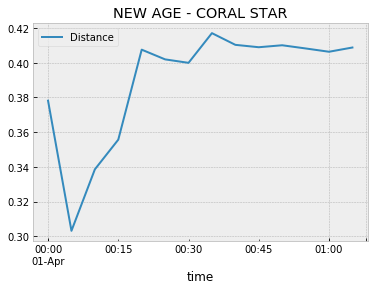

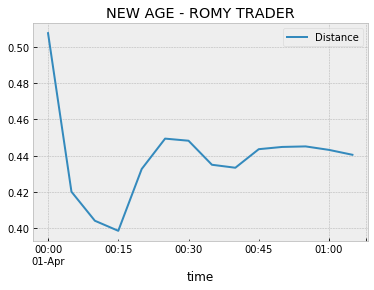

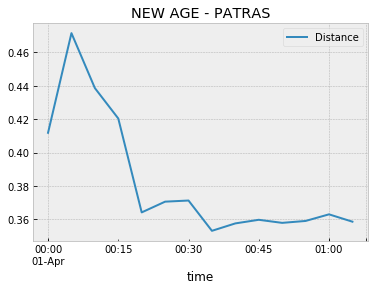

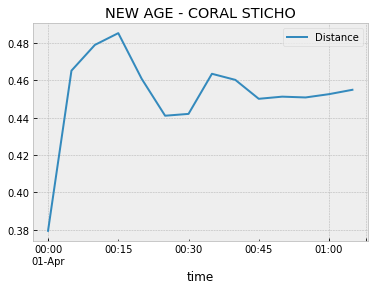

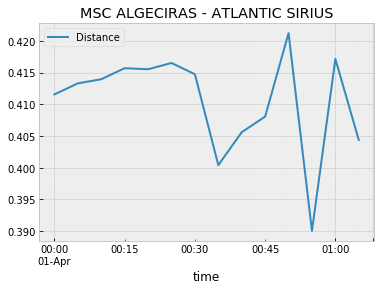

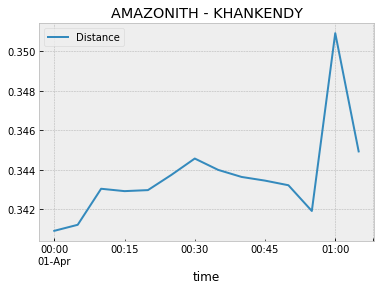

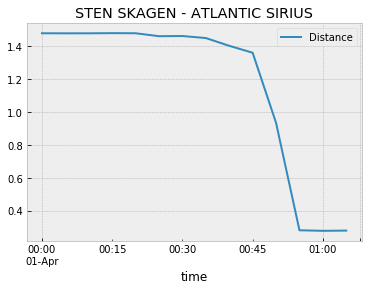

In [133]:
#creation of time range
prng = pd.date_range('4/01/2017 00:00:00', '4/01/2017 01:05:00', freq='5T').tolist()
idx = [np.random.randn(len(prng))]
dftimes = pd.DataFrame(prng, columns=['A'], index=idx)
dftimes['A'] = dftimes['A'].astype('datetime64[ns]')

dfresult = pd.DataFrame()


for df_out in AVAKDFS:
    mmsi = df_out['MMSI'].unique()
    mmsiDone = set()
    for mnum1 in mmsi:
        df_temp1 = df_out[df_out['MMSI']==mnum1]
        df_new1 = pd.merge_asof(dftimes, df_temp1, left_on = 'A' , right_on='Updatetime', direction='nearest', tolerance=pd.Timedelta('20m'))
        dist_to_vessels = dict()
        dist_to_vessels[mnum1] = dftimes.copy()
        name1 =  df_new1['Name'].unique()
        mmsiDone.add(mnum1)
        
        for mnum2 in mmsi:
            if mnum2 == mnum1:
                continue
            if mnum2 in mmsiDone:
                continue
            else:
                df_temp2 = df_out[df_out['MMSI']==mnum2]
                df_new2 = pd.merge_asof(dftimes, df_temp2, left_on = 'A' , right_on='Updatetime', direction='nearest', tolerance=pd.Timedelta('20m'))
                clms = ['time', 'Name1', 'MMSI1', 'Name2', 'MMSI2', 'Distance', 'Ankervak']
                resultTemp = pd.DataFrame(columns= clms)
                distances = []
                name2 = df_new2['Name'].unique()

                for i in range(len(dftimes)):
                    if np.isfinite([df_new1['Lat'][i], df_new1['Lon'][i], df_new2['Lat'][i], df_new2['Lon'][i]]).all():
                        point1 = (df_new1['Lat'][i], df_new1['Lon'][i])
                        point2 = (df_new2['Lat'][i], df_new2['Lon'][i])
                        dist = distance.geodesic(point1, point2).nautical
                        distances.append(dist)
                        line = {'time': df_new1['A'][i], 'Name1': name1[0], 'MMSI1':mnum1, 'Name2': name2[0],\
                                          'MMSI2': mnum2 ,'Distance': dist, 'Ankervak': df_new1['ankervak'][i] }
                        resultTemp = resultTemp.append(line, ignore_index = True)
                        
                if min(distances) < 0.4:
#                     resultTemp.plot('time', 'Distance', title = name1[0] + ' - '+ name2[0]
                    dfresult = pd.concat([dfresult, resultTemp], axis = 0, ignore_index = True)
                               

# plt.show()

In [21]:
writefilename2 = 'F:\\AIS KWC export april 2017\\'+ 'distances201704100419.csv'

In [22]:
dfresult.to_csv(writefilename2)